In [1]:
import gammapy
print(gammapy.__version__)

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from gammapy.data import DataStore, Observation
from gammapy.datasets import MapDataset
from gammapy.maps import MapAxis, WcsGeom
from gammapy.makers import MapDatasetMaker

0.20.1


In [2]:
data_store = DataStore.from_dir("$GAMMAPY_DATA/hess-dl3-dr1")
obs_id = [23523] # just one observation 
obs1 = data_store.get_observations(obs_id)[0]

In [3]:
crab_pos = SkyCoord(184.557, -5.784, unit='deg', frame='galactic') 
obs_pos=obs1.pointing_radec
ebins = np.logspace(-1,2,49)
energy_axis = MapAxis.from_edges(
    ebins, unit="TeV", name="energy", interp="log"  
)
energy_axis_true = MapAxis.from_edges(
    ebins, unit="TeV", name="energy_true", interp="log"  
)
migra_axis = MapAxis.from_bounds(
    0.5, 2, nbin=150, node_type="edges", name="migra"
)
geom = WcsGeom.create(
    skydir=obs_pos,
    binsz=0.02,
    width=(3.5, 3.5),
    frame="icrs",
    proj="CAR",
    axes=[energy_axis],
)

In [4]:
%%time
maker = MapDatasetMaker(selection=['edisp'])
reference = MapDataset.create(geom=geom, energy_axis_true=energy_axis_true, migra_axis=migra_axis)  #, migra_axis=migra_axis

dataset = maker.run(reference, obs1)

CPU times: user 929 ms, sys: 112 ms, total: 1.04 s
Wall time: 1.05 s


In [5]:
kernel_from_ds = dataset.edisp.get_edisp_kernel(energy_axis)
kernel_from_edisp2d = obs1.edisp.to_edisp_kernel(0.1*u.deg,
                                                 energy_true=energy_axis.edges, 
                                                 energy = energy_axis.edges)

<AxesSubplot:xlabel='True Energy [TeV]', ylabel='Energy [TeV]'>

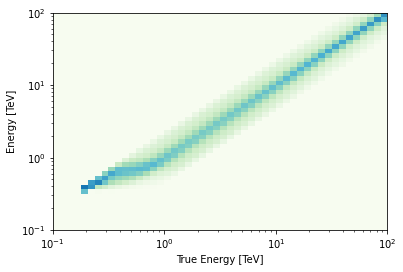

In [6]:
kernel_from_ds.plot_matrix()

In [7]:
kernel_from_ds.axes[1].center[16]

<Quantity 1.07460783 TeV>

Text(0.5, 0, 'energy_true [TeV]')

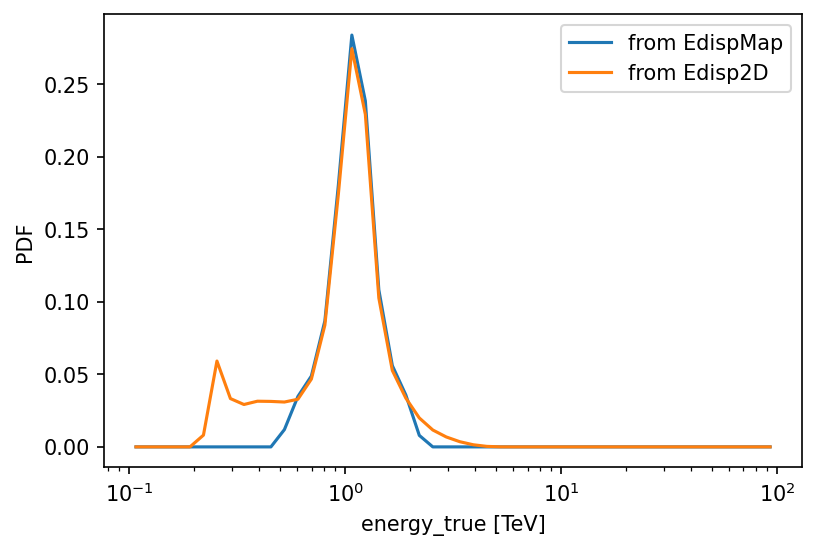

In [8]:
plt.figure(dpi=150)
plt.plot(energy_axis.center, kernel_from_ds.pdf_matrix[:,16], label='from EdispMap')
plt.plot(energy_axis.center, kernel_from_edisp2d.pdf_matrix[:,16], label='from Edisp2D')
plt.legend()
plt.semilogx()
plt.ylabel('PDF')
plt.xlabel('energy_true [TeV]')